# Testing

In [2]:
import pandas as pd
import pyarrow
df = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/clusters-ol-lang.parquet', engine='pyarrow')  #
df

,language_flag,cluster
0,1,100308874
1,0,114902799
2,1,118858471
3,0,100782976
4,0,114903282
...,...,...
44936384,0,114903445
44936385,0,114903445
44936386,0,114903445
44936387,1,100816872


In [ ]:
import pandas as pd
import pyarrow
df = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/editions.parquet', engine='pyarrow')

print(df)

In [1]:
import pandas as pd
df_language_edition = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/editions.parquet', engine='pyarrow')

df_language_edition

,id,key,title,language_flag
0,1,/books/OL1000023M,Selected letters of Rabindranath Tagore,1
1,2,/books/OL10000506M,Public Processions Etc. (Northern Ireland) Bil...,0
2,3,/books/OL1000058M,When men revolt and why,1
3,4,/books/OL10000613M,Crime and Disorder Bill [H.L.],0
4,5,/books/OL10000640M,Teaching and Higher Education Bill [H.L.],0
...,...,...,...,...
46947995,46947996,/books/OL9999127M,House of Lords Official Report (Parliamentary ...,0
46947996,46947997,/books/OL9999217M,House of Lords Official Report (Parliamentary ...,0
46947997,46947998,/books/OL999936M,"Tolstoy, woman, and death",1
46947998,46947999,/books/OL9999426M,House of Lords Official Report (Parliamentary ...,0


In [2]:
df_ids_works = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/edition-works.parquet', engine='pyarrow')

In [8]:
df_ids_works

,edition,work
0,1,308874
1,2,14902799
2,3,18858471
3,4,14903278
4,5,14903282
...,...,...
44936384,46947995,14903445
44936385,46947996,14903445
44936386,46947997,14903445
44936387,46947998,816872


In [3]:
df_edition_work_lang = pd.merge(
    df_language_edition[['id', 'language_flag']],
    df_ids_works[['edition', 'work']],
    left_on='id',
    right_on='edition',
    how='inner'
)
df_edition_work_lang = df_edition_work_lang.drop(columns=['id'])
df_edition_work_lang

,language_flag,edition,work
0,1,1,308874
1,0,2,14902799
2,1,3,18858471
3,0,4,14903278
4,0,5,14903282
...,...,...,...
44936384,0,46947995,14903445
44936385,0,46947996,14903445
44936386,0,46947997,14903445
44936387,1,46947998,816872


In [4]:
df_work_clusters = pd.read_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/work-clusters.parquet', engine='pyarrow')
df_work_clusters

,work_id,cluster
0,9945053,109945053
1,9944141,109944141
2,987538,100987538
3,9575333,109575333
4,95181,100095181
...,...,...
34230822,34422180,134422180
34230823,15581116,104371843
34230824,4371843,104371843
34230825,15498960,104371843


In [5]:
df_work_cluster_lang = pd.merge(
    df_edition_work_lang[['work', 'language_flag']],
    df_work_clusters[['work_id', 'cluster']],
    left_on='work',
    right_on='work_id',
    how='inner'
)
df_work_cluster_lang = df_work_cluster_lang.drop(columns=['work', 'work_id'])
df_work_cluster_lang

,language_flag,cluster
0,1,100308874
1,0,114902799
2,1,118858471
3,0,100782976
4,0,114903282
...,...,...
44936384,0,114903445
44936385,0,114903445
44936386,0,114903445
44936387,1,100816872


In [7]:
df_work_cluster_lang.to_parquet('/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/openlibrary/clusters-ol-lang.parquet')

In [4]:
frequency = df['language_flag'].value_counts()
frequency

language_flag
1    24987258
3    12723289
0     7206359
2       19483
Name: count, dtype: int64

In [8]:
count = (df['language_flag'] == 1).sum()

print(f"Number of entries with value 1 in column 'language_flag': {count}")

Number of entries with value 1 in column 'language_flag': 26122381


In [9]:
count = (df['language_flag'] == 2).sum()

print(f"Number of entries with value 2 in column 'language_flag': {count}")


Number of entries with value 2 in column 'language_flag': 20242


In [11]:
count = (df['language_flag'] == 3).sum()

print(f"Number of entries with value 3 in column 'language_flag': {count}")

Number of entries with value 3 in column 'language_flag': 13160851


In [2]:

import pandas as pd
import pyarrow

df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/cluster-ol-work-language.parquet',
    engine='pyarrow')

df

,cluster,language
0,116449341,3
1,128472880,1
2,111915575,3
3,117373473,0
4,130100867,3
...,...,...
32686046,131568490,0
32686047,118498770,1
32686048,106321657,1
32686049,136411977,0


In [3]:
frequency = df['language'].value_counts()
frequency

language
1    16739178
3    10725476
0     5022241
2      199156
Name: count, dtype: int64

In [9]:
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/loc-mds/book-languages.parquet',
    engine='pyarrow')  # or engine='fastparquet'

df

,rec_id,original_language,translated_language
0,45,None,engpro
1,230,ger,eng
2,239,None,lateng
3,242,None,engger
4,267,None,engspa
...,...,...,...
743640,9670425,rus,eng
743641,9670431,fre,eng
743642,9670475,fre,eng
743643,9670499,fre,eng


In [8]:
frequency = df['translated_language'].value_counts()
frequency

translated_language
eng                163634
ger                 28788
rus                 28572
pol                 25234
engfre              23937
                    ...  
czeslorusgerpol         1
engporita               1
gerfreengitatur         1
czeengrusspa            1
geraraenggrc            1
Name: count, Length: 13019, dtype: int64

In [1]:
import pandas as pd
import pyarrow
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/cluster-loc-translations.parquet',
    engine='pyarrow')  # or engine='fastparquet'
df

,cluster,loc_original_language
0,102286739,other
1,122411864,other
2,100573064,other
3,100342614,other
4,104007418,other
...,...,...
405262,108441981,other
405263,119267742,eng
405264,105136069,other
405265,100779941,other


In [11]:
frequency = df['language'].value_counts()
frequency

language
no-book-author    20099572
no-author-rec      6623161
other              4044264
english            3725449
no-language        3612131
unknown            1451388
Name: count, dtype: int64

In [3]:
frequency = df['loc_original_language'].value_counts()
frequency

loc_original_language
other        357279
eng           46860
ambiguous      1090
unknown          38
Name: count, dtype: int64

In [3]:
import pandas as pd
import pyarrow
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/merged_languages.parquet',
    engine='pyarrow')
df

,work_id,language_loc,language_author,language_ol
0,1201944,None,None,1.0
1,21512709,None,other,1.0
2,22584751,None,None,NaN
3,24645916,None,None,1.0
4,19219660,None,None,NaN
...,...,...,...,...
1521957,9771623,None,None,NaN
1521958,24132790,None,None,NaN
1521959,197636,None,unknown,1.0
1521960,2145002,None,other,1.0


In [4]:
frequency = df['language_loc'].value_counts()
frequency

language_loc
other        25027
eng           2240
ambiguous     1107
Name: count, dtype: int64

# RQ1 Analysis

In [1]:
import pandas as pd
import pyarrow
df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/book-links/deduced_languages.parquet',
    engine='pyarrow')
df

,work_id,deduced_language
0,13595490,eng-original
1,28069067,other-translation-not-found
2,6832578,other-translated
3,26085788,unknown
4,16947674,eng-original
...,...,...
1521957,196000,unknown
1521958,1280700,eng-original
1521959,47330041,unknown
1521960,301191,eng-original


In [2]:
df['deduced_language'].value_counts(normalize=True)

deduced_language
unknown                        0.540126
eng-original                   0.319142
other-translated               0.091811
other-translation-not-found    0.031959
ambiguous                      0.016962
Name: proportion, dtype: float64

/tmp/ipykernel_2442602/909831585.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=language_counts.index, y=language_counts.values, palette='muted')
/tmp/ipykernel_2442602/909831585.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])


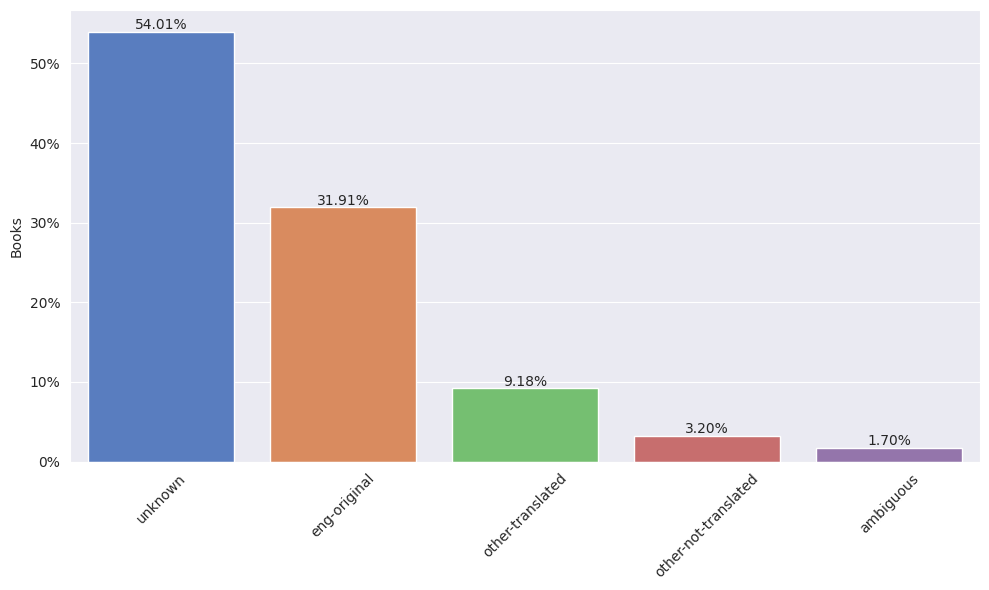

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions
language_counts = df['deduced_language'].value_counts(normalize=True)  # normalize=True gives proportions
language_counts = language_counts.rename(index={
    'other-translation-not-found': 'other-not-translated',
})
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, palette='muted')

plt.xlabel('')
plt.ylabel('Books')
plt.xticks(rotation=45)

# Add proportion values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2%}',  # Convert to percentage format
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])

plt.tight_layout()

In [4]:
genres_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-book-genres.parquet',
    engine='pyarrow')
genres_df

,book_id,genre_id,count
0,5333265,1,1
1,1333909,2,219
2,1333909,1,5
3,7327624,2,8
4,7327624,3,1
...,...,...,...
5042537,2342551,9,1
5042538,22017381,5,2
5042539,22017381,6,13
5042540,11419866,2,4


In [5]:
book_id_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-book-ids.parquet',
    engine='pyarrow')
book_id_df =  book_id_df[['book_id', 'work_id']]
book_id_df = book_id_df.dropna(subset=['work_id'])
book_id_df['work_id'] = book_id_df['work_id'].astype(int)
book_id_df = book_id_df.drop_duplicates()
book_id_df

,book_id,work_id
0,5333265,5400751
1,1333909,1323437
2,7327624,8948723
3,6066819,6243154
4,287140,278577
...,...,...
2360650,3084038,3115103
2360651,26168430,46130263
2360652,2342551,2349247
2360653,22017381,41332799


In [6]:
book_id_genre_df = pd.merge(genres_df, book_id_df, on='book_id')
book_id_genre_df = book_id_genre_df[['work_id', 'count', 'genre_id']]

book_id_genre_df = book_id_genre_df.groupby(['work_id', 'genre_id'], as_index=False)['count'].sum()
book_id_genre_df = book_id_genre_df.loc[book_id_genre_df.groupby('work_id')['count'].idxmax()]
book_id_genre_df = book_id_genre_df.reset_index(drop=True)

print(book_id_genre_df)

          work_id  genre_id  count
0              40         7    272
1              62         2    648
2              81         8     48
3              84         8    846
4              87         2   5580
...           ...       ...    ...
1125877  58369092         4     12
1125878  58369899         4     42
1125879  58370103         5      6
1125880  58374571        10     36
1125881  58377018         9      3

[1125882 rows x 3 columns]


In [7]:
work_genre_lang = book_id_genre_df.merge(df, on='work_id', how='left')
work_genre_lang

,work_id,genre_id,count,deduced_language
0,40,7,272,ambiguous
1,62,2,648,other-translated
2,81,8,48,eng-original
3,84,8,846,ambiguous
4,87,2,5580,ambiguous
...,...,...,...,...
1125877,58369092,4,12,unknown
1125878,58369899,4,42,eng-original
1125879,58370103,5,6,unknown
1125880,58374571,10,36,other-translated


In [8]:
genre_categories_df = pd.read_parquet(
    '/run/media/rares17/f15020b9-f291-4fe9-85f0-e6bd87520125/thesis/bookdata-tools/goodreads/gr-genres.parquet',
    engine='pyarrow')
genre_categories_df

,genre_id,genre
0,1,"history, historical fiction, biography"
1,2,fiction
2,3,poetry
3,4,"fantasy, paranormal"
4,5,"mystery, thriller, crime"
5,6,romance
6,7,non-fiction
7,8,children
8,9,young-adult
9,10,"comics, graphic"


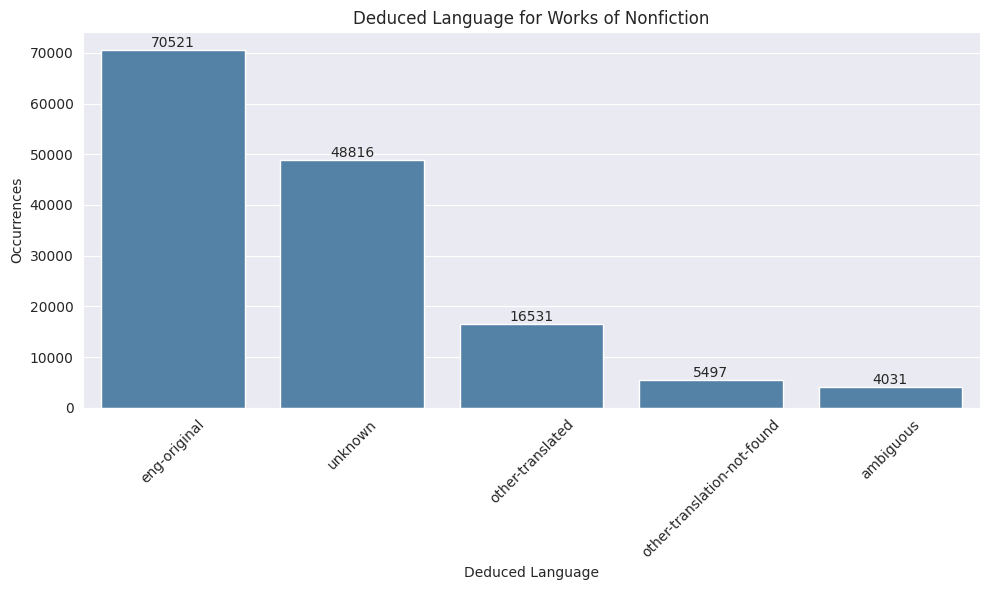

In [9]:
df_nonfiction = work_genre_lang[work_genre_lang['genre_id'] == 1]
import seaborn as sns
import matplotlib.pyplot as plt
language_counts = df_nonfiction['deduced_language'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Occurrences')
plt.title('Deduced Language for Works of Nonfiction')

plt.xticks(rotation=45)
# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignmentsteelblue
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()
plt.show()

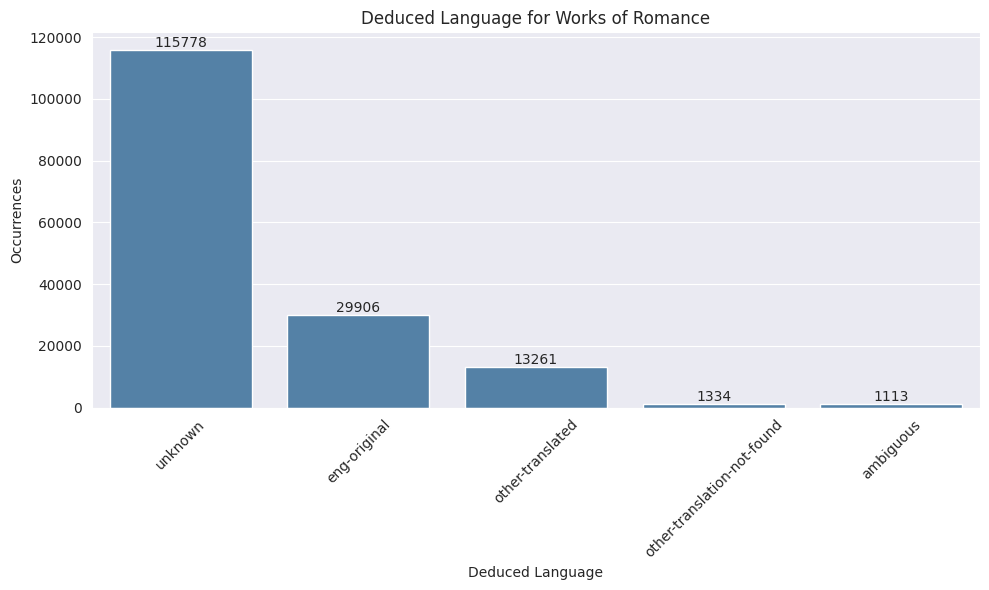

In [10]:
df_romance = work_genre_lang[work_genre_lang['genre_id'] == 6]
import seaborn as sns
import matplotlib.pyplot as plt
language_counts = df_romance['deduced_language'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=language_counts.index, y=language_counts.values, color='steelblue')

plt.xlabel('Deduced Language')
plt.ylabel('Occurrences')
plt.title('Deduced Language for Works of Romance')

plt.xticks(rotation=45)
# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text to display (the count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Offset from the bar
        textcoords='offset points',
    )

plt.tight_layout()
plt.show()

/tmp/ipykernel_2442602/2713670011.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])


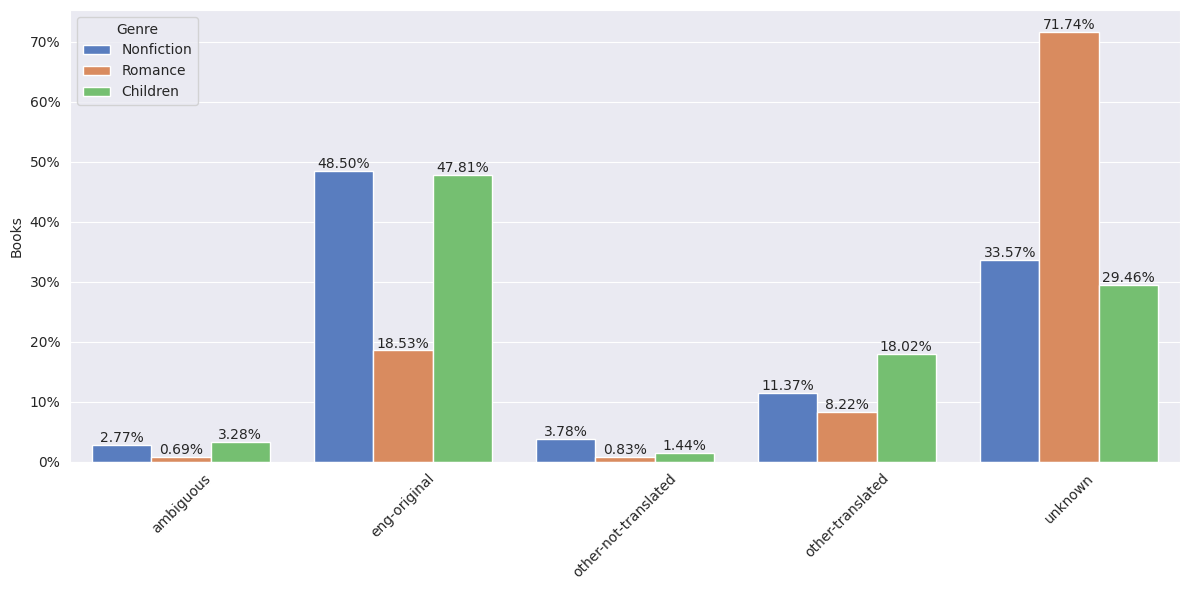

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_nonfiction = work_genre_lang[work_genre_lang['genre_id'] == 1]
df_romance = work_genre_lang[work_genre_lang['genre_id'] == 6]
df_children = work_genre_lang[work_genre_lang['genre_id'] == 8]
#df_fantasy = work_genre_lang[work_genre_lang['genre_id'] == 2]


lang_counts_nonfiction = df_nonfiction['deduced_language'].value_counts(normalize=True)
lang_counts_romance = df_romance['deduced_language'].value_counts(normalize=True)
lang_counts_children = df_children['deduced_language'].value_counts(normalize=True)
#lang_counts_fantasy = df_fantasy['deduced_language'].value_counts(normalize=True)
lang_counts_nonfiction = lang_counts_nonfiction.rename(index={
    'other-translation-not-found': 'other-not-translated',
})
lang_counts_romance = lang_counts_romance.rename(index={
    'other-translation-not-found': 'other-not-translated',
})
lang_counts_children = lang_counts_children.rename(index={
    'other-translation-not-found': 'other-not-translated',
})

ratio_df = pd.DataFrame({
    'Nonfiction': lang_counts_nonfiction,
    'Romance': lang_counts_romance,
    'Children': lang_counts_children,
    #'Fantasy': lang_counts_fantasy
}).fillna(0)

# Convert to long format for Seaborn
ratio_df = ratio_df.reset_index().melt(id_vars='deduced_language', var_name='Genre', value_name='Ratio')
ratio_df.rename(columns={'deduced_language': 'Language'}, inplace=True)#
# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ratio_df, x='Language', y='Ratio', hue='Genre', palette='muted')

plt.xlabel('')
plt.ylabel('Books')
# plt.title('Language Distribution in Nonfiction, Romance and Children')

plt.xticks(rotation=45)

# Show values on top of bars
# for p in ax.patches:
#     if p.get_height() > 0:
#         ax.annotate(
#             f'{p.get_height():.2f}',
#             (p.get_x() + p.get_width() / 2., p.get_height()),
#             ha='center', va='bottom',
#             xytext=(0, 5), textcoords='offset points'
#         )
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{p.get_height():.2%}',  # Convert to percentage format
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 5),  # Offset from the bar
            textcoords='offset points',
        )
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])

plt.tight_layout()
plt.show()